In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

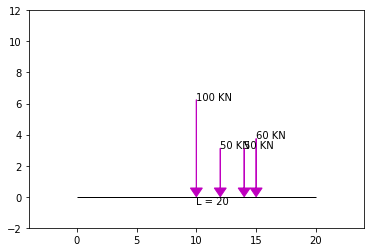

In [6]:
def calcReactions(loadIntensity, a, length):
    rightReactions = 0
    leftReactions = 0.2
    for index in range(0,len(loadIntensity)):
        rightReaction = loadIntensity[index]*a[index] / length
        leftReaction = loadIntensity[index] - rightReaction
        rightReactions += rightReaction
        leftReactions += leftReaction
    
    return(leftReactions,rightReactions)

def GetNormalisedValues(loadIntensity, leftReaction, rightReaction):
    loadIntensity.append(leftReaction)
    loadIntensity.append(rightReaction)
    normalisationValue = max(loadIntensity)
    return 10/normalisationValue

class PlottingClass:
    def __init__(self,normalisedValue):
        self.NormalisedValue = normalisedValue
  
    def PlotBoundingBox(self,ax, beamLength,load):
        leftBoundLim = -1*beamLength*0.2
        rightBoundLim = beamLength*1.2
        bottomBoundLim = -1*load*self.NormalisedValue*0.2
        topBoundLim = load*self.NormalisedValue*1.2
        ax.set_xlim(leftBoundLim,rightBoundLim)
        ax.set_ylim(bottomBoundLim,topBoundLim)
    
    def PlotSpan(self,ax,beamLength):
        lineWidth = 1
        ax.hlines(y=0, xmin=0, xmax=beamLength, linewidth=lineWidth, color='black')
        ax.text(beamLength/2,-lineWidth/2,"L = "+str(beamLength))

    def PlotLoadsAndReactions(self,ax, dist, load):
        arrowHeadLength = 9*self.NormalisedValue
        for loadIndex in range(0,len(dist)):
            ax.arrow(dist[loadIndex], load[loadIndex]*self.NormalisedValue, 0, -load[loadIndex]*self.NormalisedValue + arrowHeadLength, head_width=1.0, head_length=arrowHeadLength, fc='m', ec='m')
            ax.text(dist[loadIndex],load[loadIndex]*self.NormalisedValue,str(load[loadIndex])+" KN")
        

loadDist =[10,12,14,15]
loadIntensity = [100,50,50,60]
spanLength = 20
leftReaction, rightReaction = calcReactions(loadIntensity,loadDist,spanLength)
normalisationValue = GetNormalisedValues(loadIntensity, leftReaction, rightReaction)

fig = plt.figure()
ax = plt.axes()
BeamDiagram = PlottingClass(normalisationValue)
BeamDiagram.PlotBoundingBox(ax, spanLength,max(loadIntensity))
BeamDiagram.PlotSpan(ax, spanLength)
BeamDiagram.PlotLoadsAndReactions(ax, loadDist, loadIntensity)

plt.show()

In [166]:
  #@title Beam Data { vertical-output: true, display-mode: "form" }

beamLength = 20

loadIntensities = ([10,20,30])
loadDistances = ([10,10,10])

LeftReaction, RightReaction = calcReactions(loadIntensities,loadDistances,beamLength)


print("Right Reaction:", rightReaction)

print("Left Reaction:", leftReaction)


Right Reaction: 40.0
Left Reaction: 60.0


TypeError: ignored

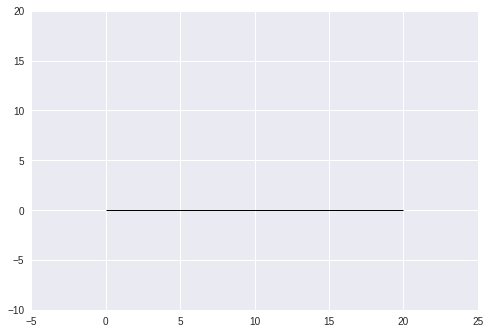

In [164]:


normalisedValues = np.amax(loadIntensity) / 10
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(-5,beamLength+5)
ax.set_ylim(-10,20)

lineWidth = 1
ax.hlines(y=0, xmin=0, xmax=beamLength, linewidth=lineWidth, color='black')

ax.arrow(a, normalisedValues, 0, -normalisedValues+9/normalisedValues, head_width=1.0, head_length=9/normalisedValues, fc='m', ec='m')

ax.arrow(0, -leftReaction/normalisedValues, 0, (leftReaction-9)/normalisedValues, head_width=1.0, head_length=9/normalisedValues, fc='b', ec='b')
ax.arrow(beamLength, -rightReaction/normalisedValues, 0, (rightReaction-9)/normalisedValues, head_width=1.0, head_length=9/normalisedValues, fc='b', ec='b')

plt.text(a-1, (loadIntensity+5)/normalisedValues, str(loadIntensity)+" KN")


plt.show()